In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Load Dataset

In [2]:
olympics_event=pd.read_csv(r"C:\Users\user\Documents\olympic_events.csv")

In [3]:
noc_region=pd.read_csv(r"C:\Users\user\Documents\data\noc_regions.csv")

### Merge the datasets

In [4]:
olympics=pd.merge(olympics_event,noc_region,on='NOC',how='left')

In [5]:
#check number of rows and columns
olympics.shape

(271116, 16)

In [6]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 16 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270767 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 35.2+ MB


### Data cleaning

In [7]:
olympics.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       349
dtype: int64

In [8]:
#deal with missing values
olympics['Age'].fillna(method='ffill',inplace=True)
olympics['Height'].fillna(method='ffill',inplace=True)
olympics['Weight'].fillna(method='ffill',inplace=True)
olympics['Medal'].fillna('No medal',inplace=True)
olympics['region'].fillna('Not given',inplace=True)

In [9]:
#check if null is still present
olympics.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
region    0
dtype: int64

In [10]:
#convert Age,Height and weight to int
olympics['Age']=olympics['Age'].apply(np.int64)
olympics['Height']=olympics['Height'].apply(np.int64)
olympics['Weight']=olympics['Weight'].apply(np.int64)

In [11]:
olympics.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,271116.000000,271116.000000,271116.000000,271116.000000
mean,68248.954396,25.586199,175.649169,71.092562,1978.378480
std,39022.286345,6.398401,10.454339,14.339696,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,61.000000,1960.000000
50%,68205.000000,25.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,80.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [12]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
0,1,A Dijiang,M,24,180,80,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal,China
1,2,A Lamusi,M,23,170,60,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal,China
2,3,Gunnar Nielsen Aaby,M,24,170,60,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No medal,Denmark
3,4,Edgar Lindenau Aabye,M,34,170,60,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,5,Christine Jacoba Aaftink,F,21,185,82,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No medal,Netherlands


In [13]:
#drop duplicate rows
olympics=olympics.drop_duplicates(keep='first')

In [14]:
olympics.shape

(269731, 16)

### Exploratory Data Analysis

### How many olympic games have been held so far from 2016

In [15]:
no_of_games=olympics['Games'].nunique()
no_of_games 

51

### List down all olympic games held so far

In [16]:
olympi_games=olympics['Games'].unique()
olympi_games

array(['1992 Summer', '2012 Summer', '1920 Summer', '1900 Summer',
       '1988 Winter', '1992 Winter', '1994 Winter', '1932 Summer',
       '2002 Winter', '1952 Summer', '1980 Winter', '2000 Summer',
       '1996 Summer', '1912 Summer', '1924 Summer', '2014 Winter',
       '1948 Summer', '1998 Winter', '2006 Winter', '2008 Summer',
       '2016 Summer', '2004 Summer', '1960 Winter', '1964 Winter',
       '1984 Winter', '1984 Summer', '1968 Summer', '1972 Summer',
       '1988 Summer', '1936 Summer', '1952 Winter', '1956 Winter',
       '1956 Summer', '1960 Summer', '1928 Summer', '1976 Summer',
       '1980 Summer', '1964 Summer', '2010 Winter', '1968 Winter',
       '1906 Summer', '1972 Winter', '1976 Winter', '1924 Winter',
       '1904 Summer', '1928 Winter', '1908 Summer', '1948 Winter',
       '1932 Winter', '1936 Winter', '1896 Summer'], dtype=object)

### Mention the total no of nations who participated in each olympic game

In [17]:
nations_participated=olympics.groupby('Games').nunique().sort_values(by='region')['region']
nations_participated

Games
1896 Summer     12
1904 Summer     14
1932 Winter     17
1924 Winter     19
1906 Summer     20
1908 Summer     22
1928 Winter     25
1948 Winter     28
1936 Winter     28
1912 Summer     29
1920 Summer     29
1960 Winter     30
1952 Winter     30
1900 Summer     31
1956 Winter     32
1972 Winter     34
1968 Winter     36
1980 Winter     36
1964 Winter     36
1976 Winter     36
1924 Summer     45
1928 Summer     46
1932 Summer     47
1984 Winter     48
1936 Summer     49
1988 Winter     56
1948 Summer     59
1992 Winter     64
1994 Winter     67
1952 Summer     67
1956 Summer     71
1998 Winter     72
2002 Winter     76
2006 Winter     78
1980 Summer     80
2010 Winter     81
1960 Summer     83
2014 Winter     88
1976 Summer     91
1964 Summer     93
1968 Summer    111
1972 Summer    120
1984 Summer    139
1988 Summer    156
1992 Summer    168
1996 Summer    196
2000 Summer    199
2004 Summer    200
2008 Summer    203
2012 Summer    204
2016 Summer    206
Name: region, dtype: int6

### Which year was the highest and lowest no of countries participating olympics

In [18]:
year_with_highest_number_of_countries=olympics.groupby('Year').nunique().sort_values(by='region',ascending=False)['region'][:1]
year_with_highest_number_of_countries

Year
2016    206
Name: region, dtype: int64

In [19]:
#lowest
year_with_lowest_number_of_countries=olympics.groupby('Year').nunique().sort_values(by='region')['region'][:1]
year_with_lowest_number_of_countries

Year
1896    12
Name: region, dtype: int64

### Which nation has participated in all of the olympic games

In [20]:
nation_in_all_games=olympics.groupby('region').nunique().sort_values(by='Games',ascending=False)['Games'][:5]

nation_in_all_games

region
Italy          51
France         51
Switzerland    51
UK             51
Austria        50
Name: Games, dtype: int64

### Age distribution of the participants

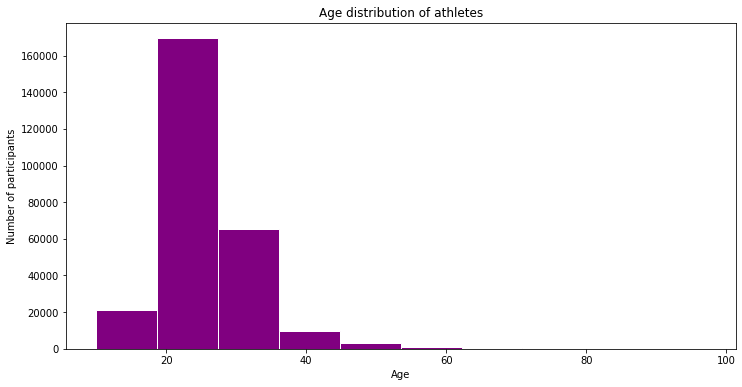

In [24]:
plt.figure(figsize=(12,6))
plt.title('Age distribution of athletes')
plt.xlabel('Age')
plt.ylabel('Number of participants')
plt.hist(olympics.Age, color='purple', edgecolor='white');


### Identify the sport which was played in all summer olympics


In [25]:
summer_sports=olympics[olympics.Season=='Summer'].Sport.unique()
summer_sports 

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

### Identify the sport which was played in all winter olympics

In [29]:
winter_sports=olympics[olympics.Season=='Winter'].Sport.unique()
winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

### Fetch the total number of sports played in each olympic games

In [26]:
no_sports_in_each_olympic_game=olympics.groupby('Games').nunique().sort_values(by='Sport')['Sport']
no_sports_in_each_olympic_game

Games
1932 Winter     7
1960 Winter     8
1956 Winter     8
1952 Winter     8
1928 Winter     8
1936 Winter     8
1896 Summer     9
1948 Winter     9
1972 Winter    10
1984 Winter    10
1968 Winter    10
1964 Winter    10
1988 Winter    10
1980 Winter    10
1976 Winter    10
1924 Winter    10
1994 Winter    12
1992 Winter    12
1906 Summer    13
1998 Winter    14
2002 Winter    15
2006 Winter    15
2014 Winter    15
2010 Winter    15
1928 Summer    17
1912 Summer    17
1932 Summer    18
1904 Summer    18
1952 Summer    19
1956 Summer    19
1960 Summer    19
1968 Summer    20
1924 Summer    20
1900 Summer    20
1948 Summer    20
1964 Summer    21
1980 Summer    23
1976 Summer    23
1972 Summer    23
1936 Summer    24
1908 Summer    24
1920 Summer    25
1984 Summer    25
1988 Summer    27
1992 Summer    29
1996 Summer    31
2012 Summer    32
2000 Summer    34
2004 Summer    34
2008 Summer    34
2016 Summer    34
Name: Sport, dtype: int64

### Male and female participants

In [30]:
gender_counts=olympics.Sex.value_counts()
gender_counts

M    195353
F     74378
Name: Sex, dtype: int64

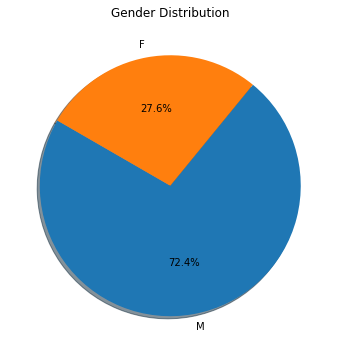

In [33]:
plt.figure(figsize=(12,6))
plt.title('Gender Distribution')
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=150,shadow=True);

### Total medals

In [35]:
total_medals=olympics['Medal'].value_counts()
total_medals

No medal    229959
Gold         13369
Bronze       13295
Silver       13108
Name: Medal, dtype: int64

### Female participation

In [36]:
#female participation in the summer
femaale_olympics=olympics[(olympics.Sex=='F')&(olympics.Season=='Summer')]

Text(0.5, 1.0, 'Female Participation')

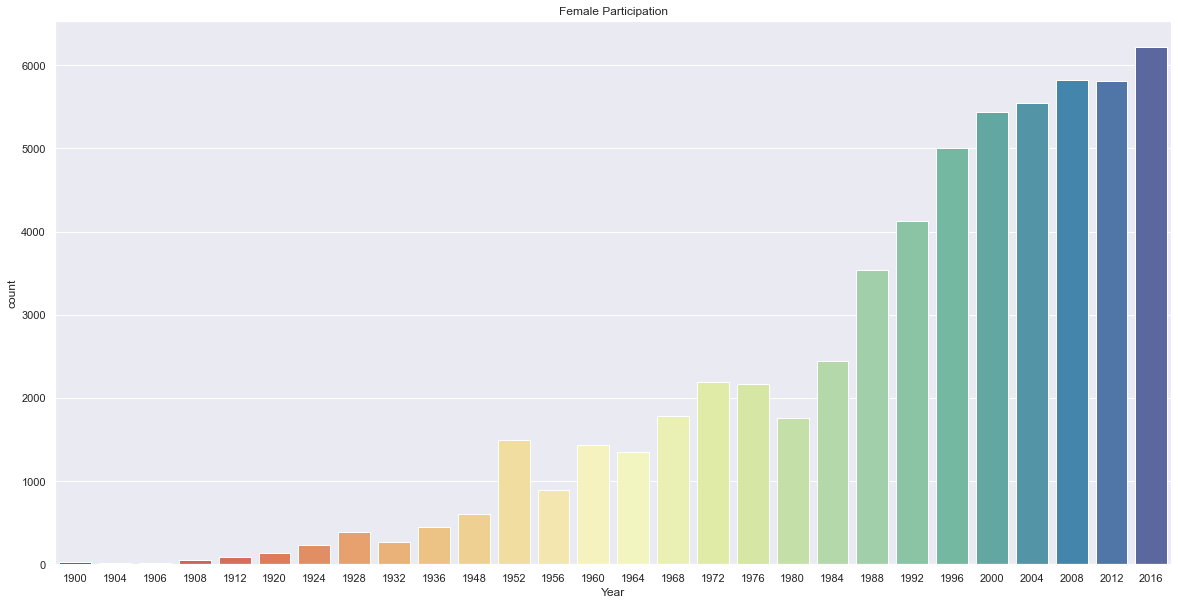

In [37]:
sns.set(style='darkgrid')
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=femaale_olympics,palette='Spectral')
plt.title('Female Participation')

### Gold medal atheletes

In [38]:
gold_medalist=olympics[(olympics.Medal=='Gold')]
gold_medalist.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
3,4,Edgar Lindenau Aabye,M,34,170,60,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
42,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland
48,17,Paavo Johannes Aaltonen,M,28,175,64,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland
60,20,Kjetil Andr Aamodt,M,20,176,85,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway


In [40]:
# Gold medalist above the age of 60
gold_medalist_above_60=olympics[(olympics.Medal=='Gold')&(olympics.Age>60)]
gold_medalist_above_60

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region
7498,4189,Nikolaos Andriakopoulos,M,65,180,85,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,Greece
104003,52626,Isaac Lazarus Israls,M,63,189,119,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands
105199,53238,Charles Jacobus,M,64,171,85,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63,200,107,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA
226374,113773,"Galen Carter ""G. C."" Spencer",M,63,165,53,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA
233390,117046,Oscar Gomer Swahn,M,64,173,65,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden
261102,130662,"Robert W. Williams, Jr.",M,63,185,75,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA


### Gold medals from each country

In [47]:
gold_medalist.region.value_counts().reset_index(name='Medal').head()
#top 5 gold medals

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,677
4,Italy,575


Text(0.5, 1.0, 'Gold Medals per Country')

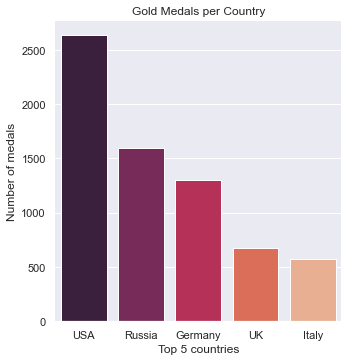

In [49]:
total_gold=gold_medalist.region.value_counts().reset_index(name='Medal').head(5)
p=sns.catplot(x='index',y='Medal',data=total_gold,height=5,kind='bar',palette='rocket')
p.despine(left=True)
p.set_xlabels('Top 5 countries')
p.set_ylabels('Number of medals')
plt.title('Gold Medals per Country')

### Silver medals from each country

In [53]:
total_silver=silver_medal.region.value_counts().reset_index(name='Medal').head(5)
total_silver

,index,Medal
0,USA,1641
1,Germany,1195
2,Russia,1170
3,UK,739
4,France,602


Text(0.5, 1.0, 'Silver Medals per Country')

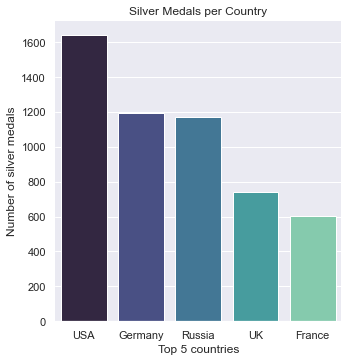

In [54]:
silver_medal=olympics[(olympics.Medal=='Silver')]
total_silver=silver_medal.region.value_counts().reset_index(name='Medal').head(5)
p=sns.catplot(x='index',y='Medal',data=total_silver,height=5,kind='bar',palette='mako')
p.despine(left=True)
p.set_xlabels('Top 5 countries')
p.set_ylabels('Number of silver medals')
plt.title('Silver Medals per Country')

Text(0.5, 1.0, 'Bronze Medals per Country')

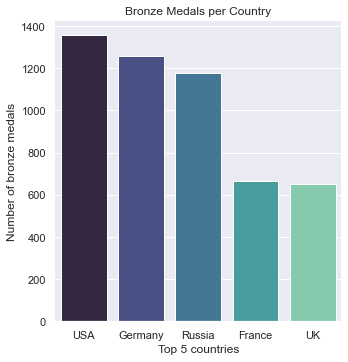

In [57]:
bronze_medal=olympics[(olympics.Medal=='Bronze')]
total_bronze=bronze_medal.region.value_counts().reset_index(name='Medal').head(5)
p=sns.catplot(x='index',y='Medal',data=total_bronze,height=5,kind='bar',palette='mako')
p.despine(left=True)
p.set_xlabels('Top 5 countries')
p.set_ylabels('Number of bronze medals')
plt.title('Bronze Medals per Country')

### Rio olympics

In [59]:
# medals in rio olympics
# rio olympics is 2016 olympics
team_names=olympics[(olympics.Year==2016)&(olympics.Medal=='Gold')].Team
team_names.value_counts().head(10)



United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

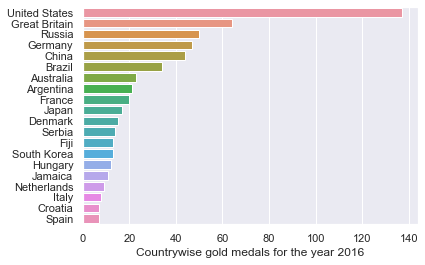

In [60]:
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel('Countrywise gold medals for the year 2016');